# 그래프 그리기 연습문제

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\anaconda\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
penguins = sns.load_dataset("penguins")

In [6]:
# 에러화면 세팅

import warnings

warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)

#테마설정
sns.set_theme(style = 'darkgrid')

#한글 인식
plt.rc('font', family = 'Malgun Gothic')

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 1. seaborn 하나

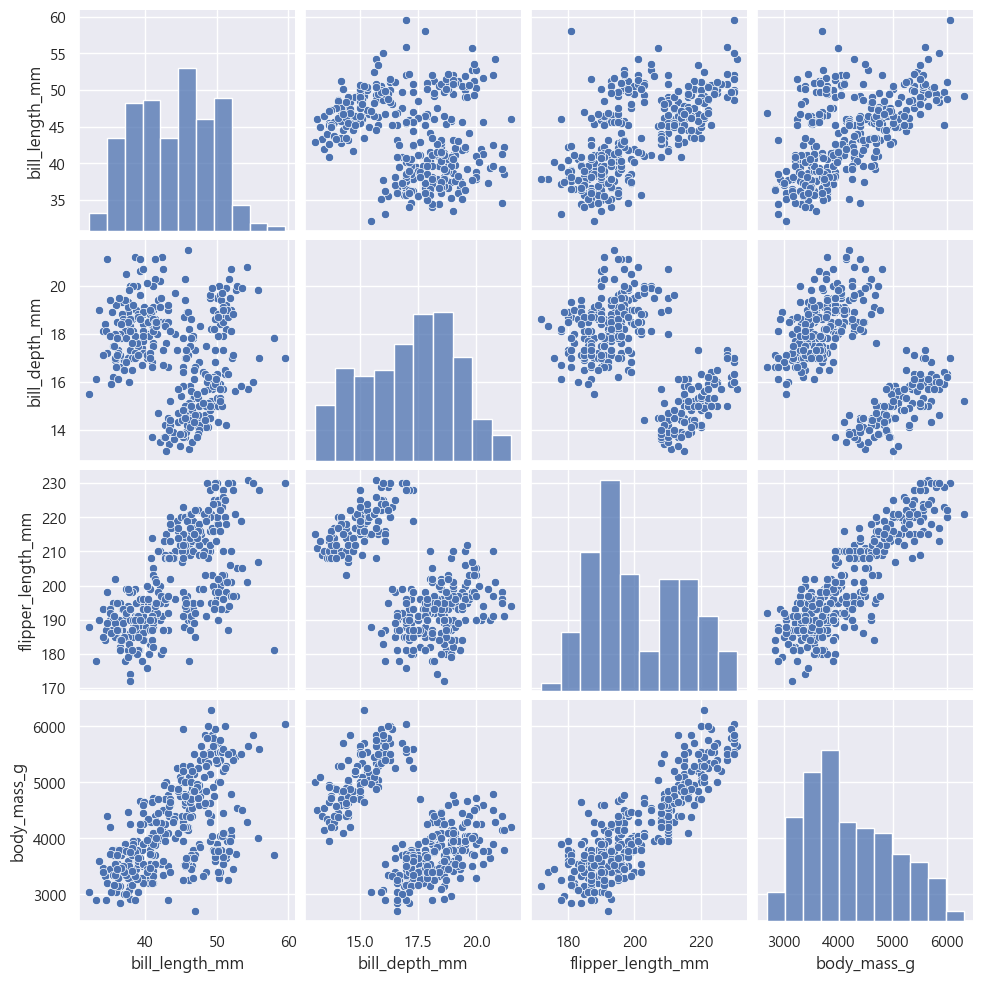

In [7]:
sns.pairplot(penguins)

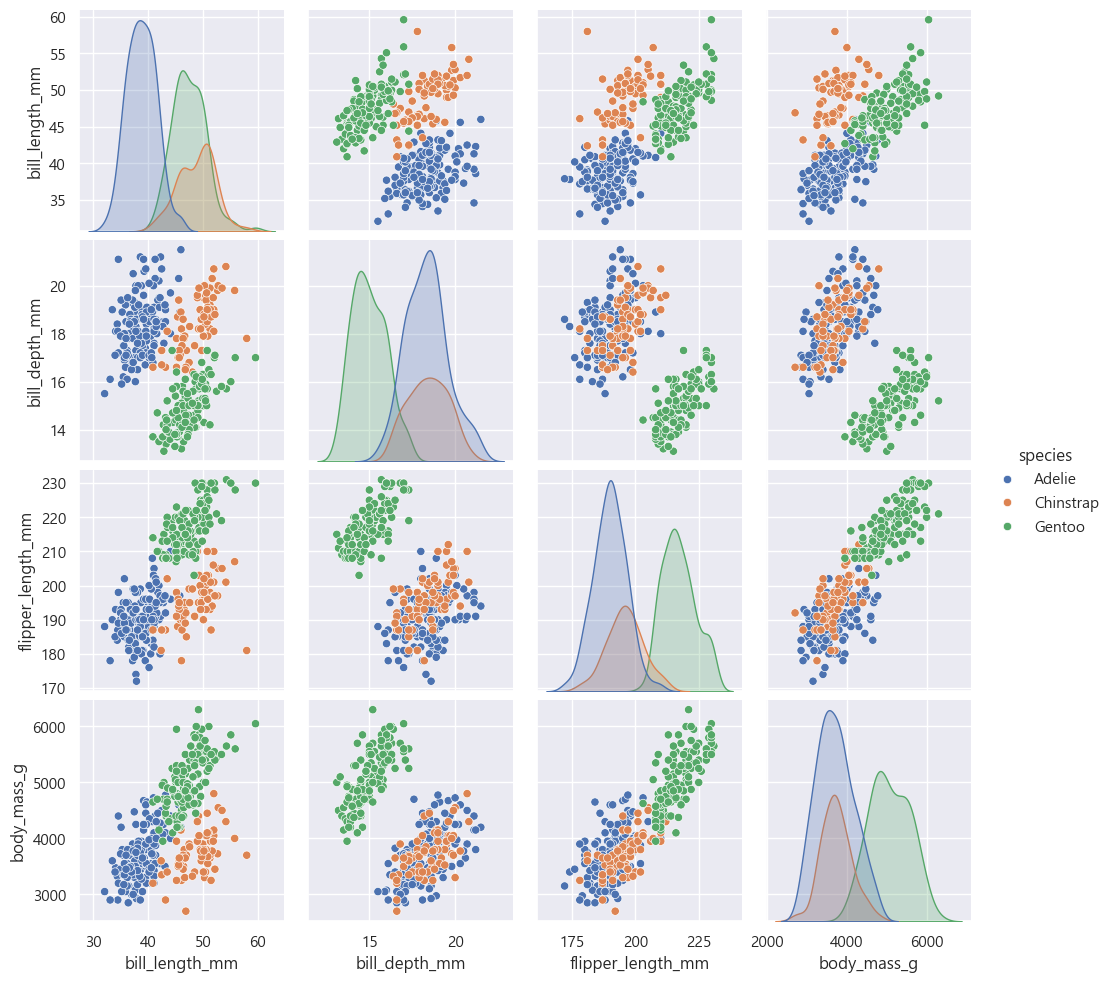

In [8]:
sns.pairplot(penguins,
             hue = 'species')

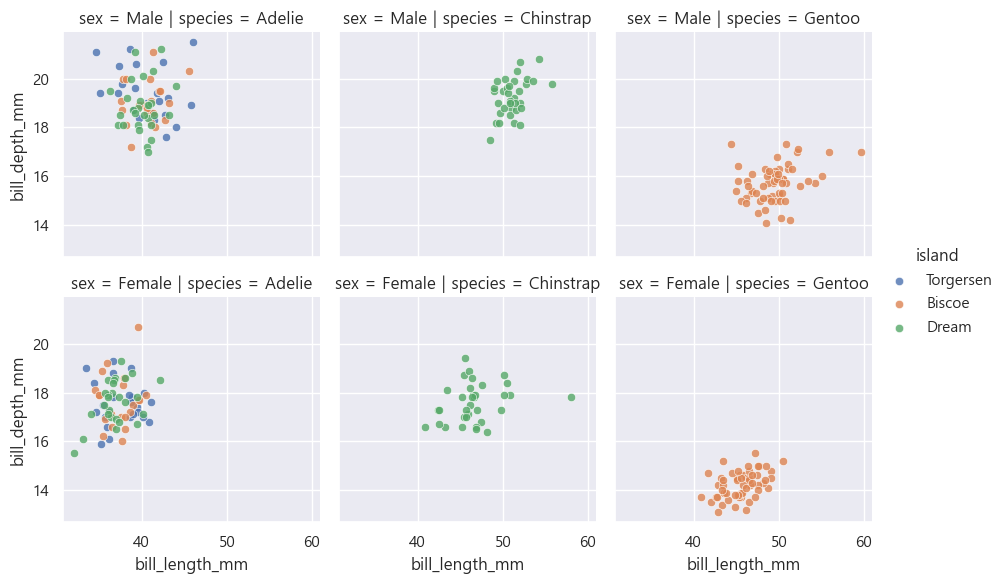

In [28]:
p = sns.FacetGrid(row = "sex",
                  col = "species",
                  hue = "island",
                  height = 3,
                  aspect = 1.0,
                  data = penguins)
p.map(sns.scatterplot,
      "bill_length_mm",
      "bill_depth_mm",
      alpha = 0.8)

p.add_legend()
plt.show()

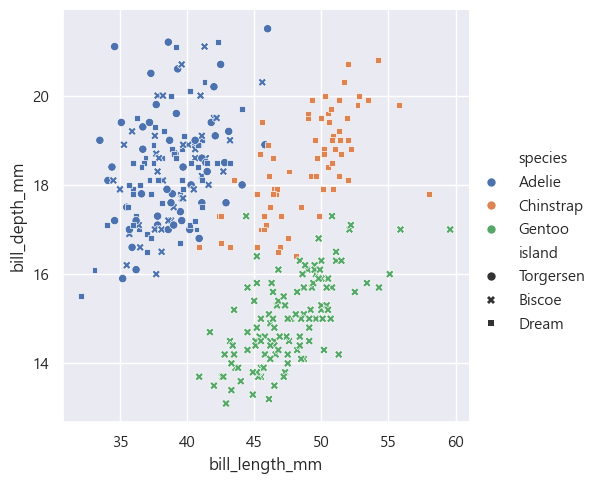

In [29]:
sns.relplot(x = "bill_length_mm",
            y = "bill_depth_mm",
            data = penguins,
            hue = "species",
            style = "island")

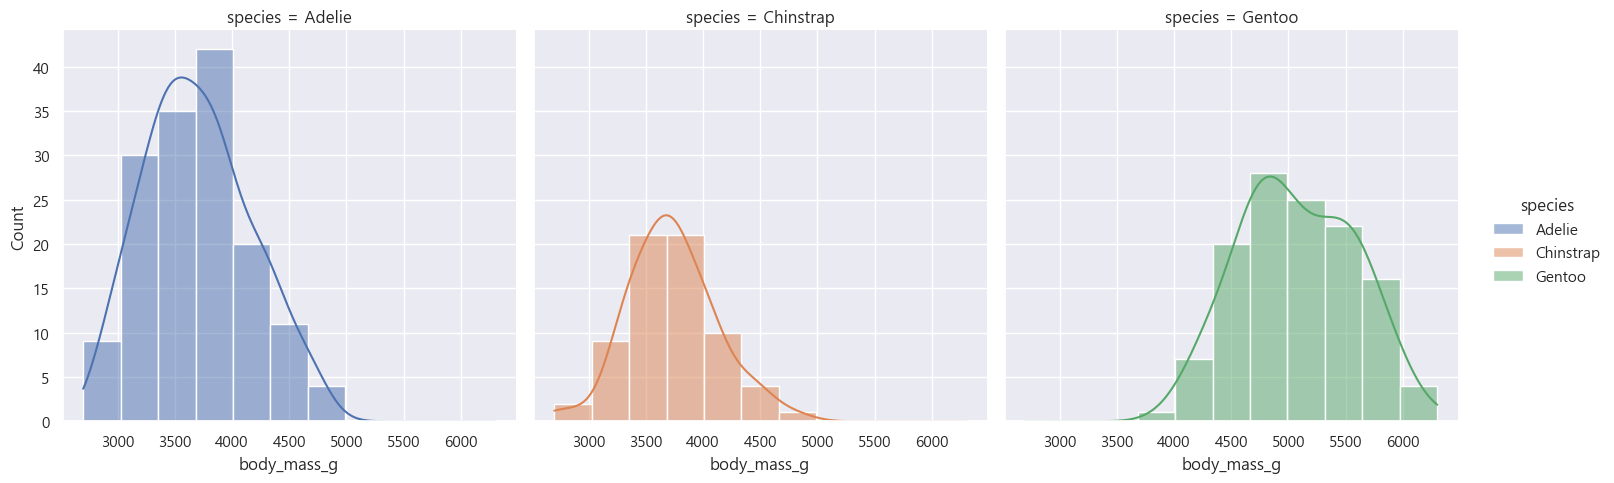

In [33]:
sns.displot(x = "body_mass_g",
            fill = True,
            kde = True,
            kind = "hist",
            hue = "species",
            col = "species",
            data = penguins)

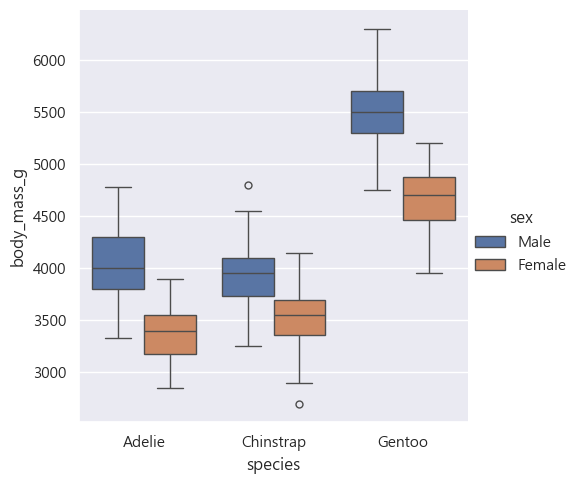

In [34]:
sns.catplot(x = "species",
            y = "body_mass_g",
            hue = "sex",
            kind = "box",
            data = penguins)

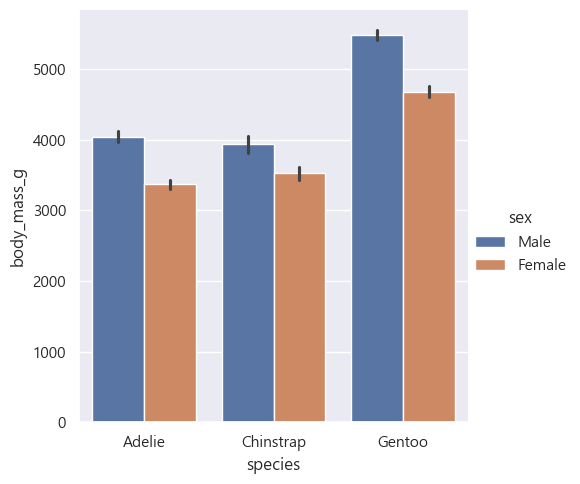

In [35]:
sns.catplot(x = "species",
            y = "body_mass_g",
            hue = "sex",
            kind = "bar",
            data = penguins)

## 2. matplotlib
- 5번까지만. 3d는 생략

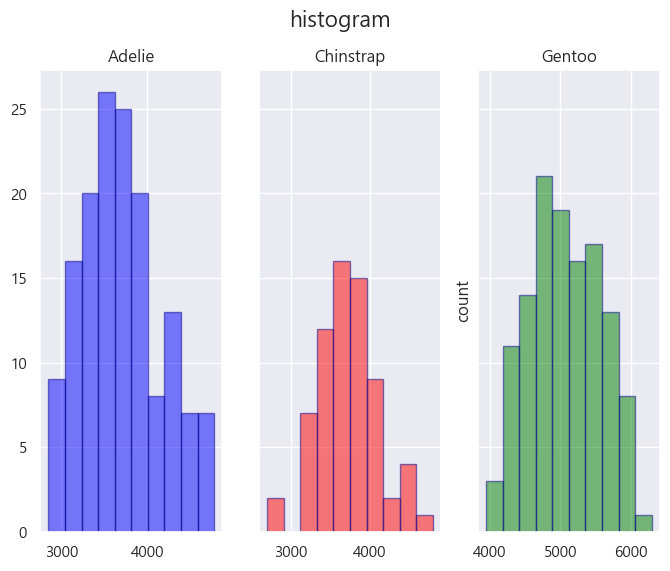

In [56]:
s1 = penguins[penguins.species == "Adelie"].body_mass_g
s2 = penguins[penguins.species == "Chinstrap"].body_mass_g
s3 = penguins[penguins.species == "Gentoo"].body_mass_g

fig, ax = plt.subplots(1, 3, figsize = (8,6), sharey = True)

ax[0].hist(s1, bins = 10,
        color = 'blue', alpha = 0.5, edgecolor = 'darkblue', label = "Adelie")
ax[0].set(title = 'Adelie')

ax[1].hist(s2, bins = 10,
        color = 'red', alpha = 0.5, edgecolor = 'darkblue', label = "Chinstrap")
ax[1].set(title = 'Chinstrap')

ax[2].hist(s3, bins = 10,
        color = 'green', alpha = 0.5, edgecolor = 'darkblue', label = "Gentoo")
ax[2].set(title = 'Gentoo', ylabel = "count")

fig.suptitle('histogram', fontsize = 16)

plt.show()

C:\Users\SikBread\AppData\Local\Temp\ipykernel_8308\3305283809.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data,


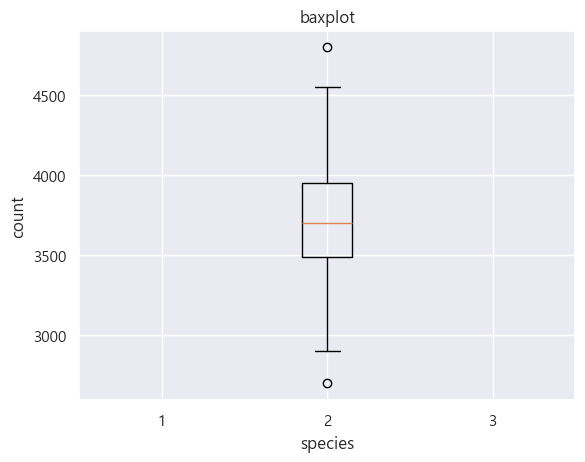

In [58]:
s1 = penguins[penguins.species == "Adelie"].body_mass_g
s2 = penguins[penguins.species == "Chinstrap"].body_mass_g
s3 = penguins[penguins.species == "Gentoo"].body_mass_g

labels = ["1", "2", "3"]
data = [s1, s2, s3]

fig, ax = plt.subplots()
ax.boxplot(data,
           labels = labels)
ax.set(title = 'baxplot',
       xlabel = 'species',
       ylabel = "count")
plt.show()


In [86]:
penguins = penguins.dropna(axis = 0)
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

C:\Users\SikBread\AppData\Local\Temp\ipykernel_8308\2001884956.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data,


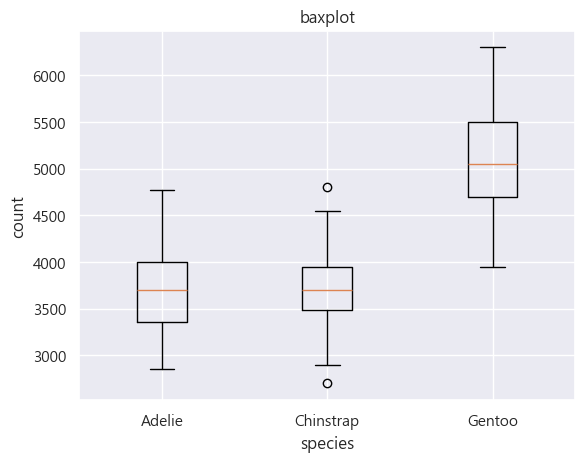

In [87]:
# null 값이 존재하여 안그려짐. 데이터 전처리 필요 (아마도)

s1 = np.array(penguins[penguins.species == "Adelie"].body_mass_g)
s2 = np.array(penguins[penguins.species == "Chinstrap"].body_mass_g)
s3 = np.array(penguins[penguins.species == "Gentoo"].body_mass_g)

labels = ["Adelie", "Chinstrap", "Gentoo"]
data = [s1, s2, s3]

fig, ax = plt.subplots()
ax.boxplot(data,
           labels = labels)
ax.set(title = 'baxplot',
       xlabel = 'species',
       ylabel = "count")

plt.show()


[Text(0, 0, '152'), Text(0, 0, '124'), Text(0, 0, '68')]

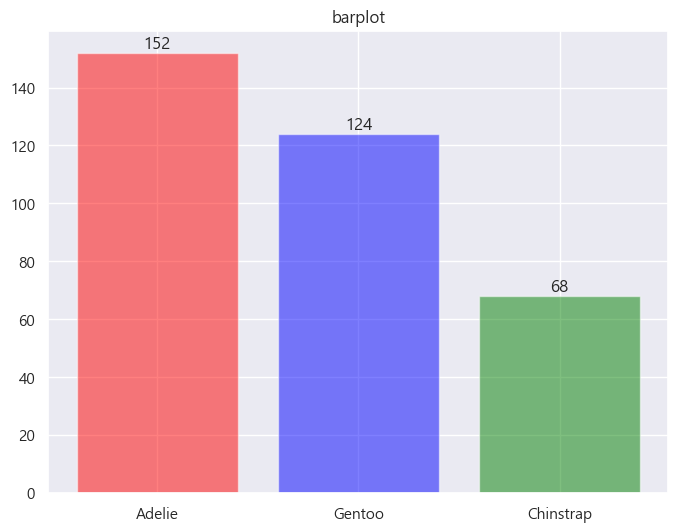

In [68]:
count = penguins['species'].value_counts()

labels = count.index
fig, ax = plt.subplots(figsize = (8,6))
bar_colors = ['red', 'blue', 'green', 'orange']
bar_container = ax.bar(labels, count,
                       color = bar_colors, alpha = 0.5)

ax.set(title = 'barplot')
ax.bar_label(bar_container, fmt = '{:,.0f}')

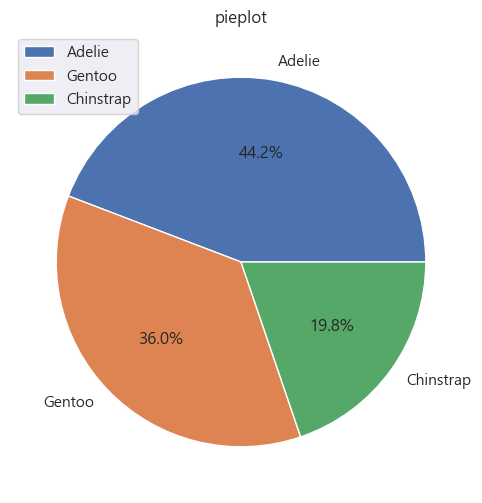

In [76]:
count = penguins['species'].value_counts()
labels = count.index

fig, ax = plt.subplots(figsize = (8,6))
ax.pie(count, labels = labels,
       autopct="%1.1f%%")

ax.set(title = 'pieplot')
ax.bar_label(bar_container, fmt = '{:,.0f}')

ax.legend()
plt.show()

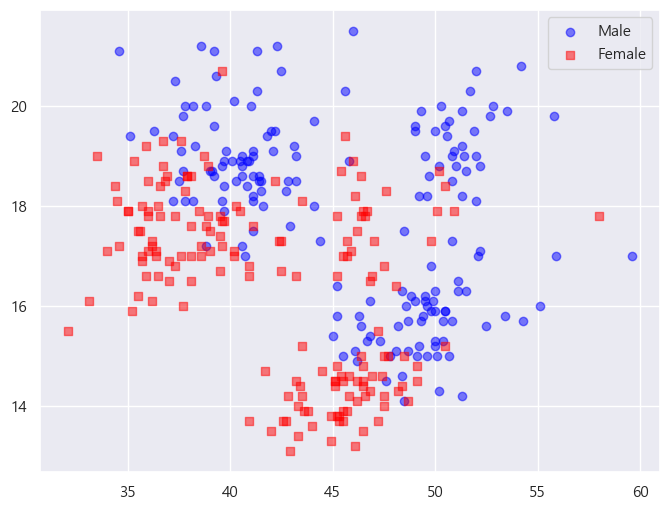

In [101]:
x1 = penguins[penguins.sex == "Male"].bill_length_mm
x2 = penguins[penguins.sex == "Female"].bill_length_mm
x3 = penguins[penguins.sex == "Male"].bill_depth_mm
x4 = penguins[penguins.sex == "Female"].bill_depth_mm

data = [x1,x2,x3,x4]

fig, ax = plt.subplots(1,1, figsize = (8,6))

ax.scatter(x1, x3,
           c = 'blue', marker='o',alpha=0.5, label = "Male")
ax.scatter(x2, x4,
           c = 'red', marker='s', alpha=0.5, label = "Female")
ax.legend()
plt.show()
